In [3]:
# For analysis and numerical functions 
import pandas as pd 
import numpy as np 

# For Vizualization 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [4]:
df=pd.read_csv('/Users/nishu/Udupi_Mallige_Pricing_Report_22072024112559.csv')

In [5]:
df.head()

,Date,Mallige,Jaaji
0,2018-10-02,170,0
1,2018-10-01,210,0
2,2018-10-03,310,0
3,2018-10-04,290,0
4,2018-10-07,660,0


In [6]:
df=df.drop('Jaaji',axis=1)

In [7]:
df.head()

,Date,Mallige
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2099 non-null   object
 1   Mallige  2099 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2099 non-null   datetime64[ns]
 1   Mallige  2099 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.9 KB


In [11]:
# df.index=df['Date']
# del df['Date']

In [12]:
df.head()

,Date,Mallige
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [13]:
df=df.rename(columns={'Mallige':'Price'})

In [14]:
df.head(5)

,Date,Price
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [15]:
df.tail(5)

,Date,Price
2094,2024-07-17,430
2095,2024-07-18,430
2096,2024-07-19,470
2097,2024-07-20,470
2098,2024-07-21,430


In [16]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [17]:
df.describe()

,Date,Price
count,2099,2099.000000
mean,2021-08-31 20:22:31.500714752,647.131968
min,2018-10-01 00:00:00,50.000000
25%,2020-03-10 12:00:00,300.000000
50%,2021-09-06 00:00:00,530.000000
75%,2023-02-12 12:00:00,950.000000
max,2024-07-21 00:00:00,2100.000000
std,NaN,448.309043


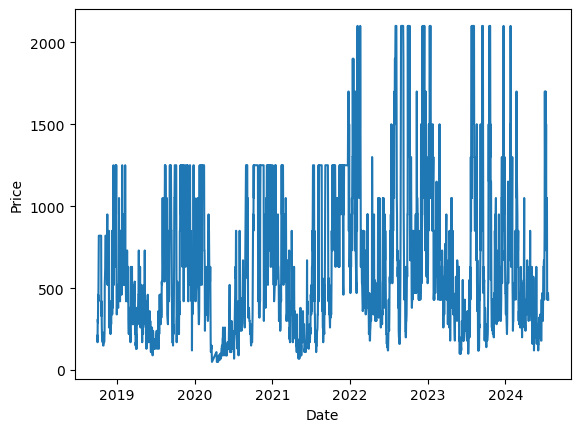

In [18]:
sns.lineplot(x="Date", y="Price", data=df) 
plt.show()

In [19]:
df['Date']

0      2018-10-02
1      2018-10-01
2      2018-10-03
3      2018-10-04
4      2018-10-07
          ...    
2094   2024-07-17
2095   2024-07-18
2096   2024-07-19
2097   2024-07-20
2098   2024-07-21
Name: Date, Length: 2099, dtype: datetime64[ns]

In [20]:
df_2023=df[df['Date'].dt.year == 2023]

In [21]:
df_2023

,Date,Price
1531,2023-01-01,530
1532,2023-01-02,550
1533,2023-01-03,670
1534,2023-01-04,1300
1535,2023-01-05,850
...,...,...
1891,2023-12-27,950
1892,2023-12-28,1300
1893,2023-12-29,1300
1894,2023-12-30,850


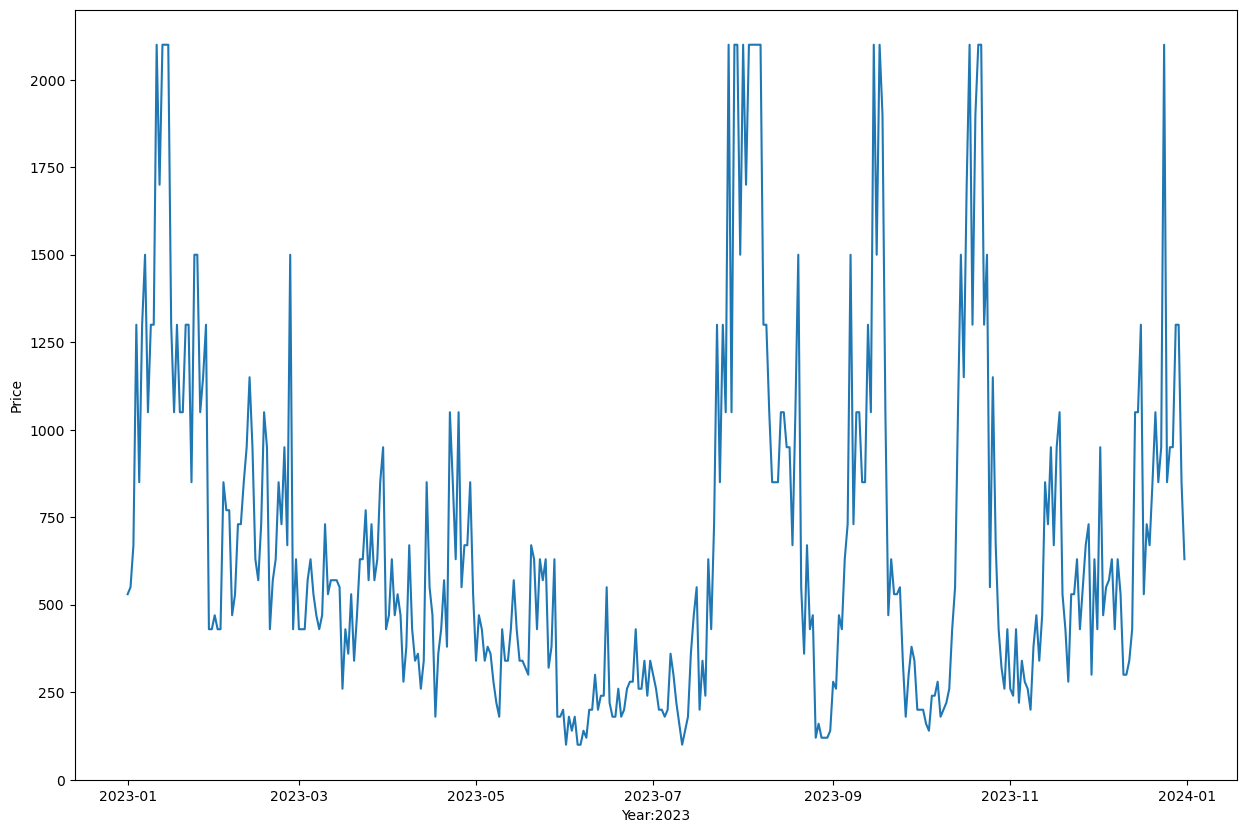

In [22]:
plt.figure(figsize=(15,10))

sns.lineplot(x="Date", y="Price", data=df_2023) 
plt.xlabel('Year:2023')
plt.ylabel('Price')
plt.show()



In [23]:
df['year']=df['Date'].dt.year
df.head()

,Date,Price,year
0,2018-10-02,170,2018
1,2018-10-01,210,2018
2,2018-10-03,310,2018
3,2018-10-04,290,2018
4,2018-10-07,660,2018


In [24]:
df.index=df['Date']
del df['Date']

In [25]:
df

,Price,year
Date,,
2018-10-02,170,2018
2018-10-01,210,2018
2018-10-03,310,2018
2018-10-04,290,2018
2018-10-07,660,2018
...,...,...
2024-07-17,430,2024
2024-07-18,430,2024
2024-07-19,470,2024


In [26]:
df_2021=df.query('year == 2021')

In [27]:
df_2021

,Price,year
Date,,
2021-01-01,950,2021
2021-01-02,1250,2021
2021-01-03,630,2021
2021-01-04,730,2021
2021-01-05,730,2021
...,...,...
2021-12-27,850,2021
2021-12-28,1500,2021
2021-12-29,630,2021


In [28]:
df_2022=df.query('year == 2022')

In [29]:
df_2022

,Price,year
Date,,
2022-01-01,850,2022
2022-01-02,670,2022
2022-01-03,470,2022
2022-01-04,530,2022
2022-01-05,850,2022
...,...,...
2022-12-27,570,2022
2022-12-28,730,2022
2022-12-29,670,2022


In [30]:
df_2023=df.query('year == 2023')

In [31]:
df_2023

,Price,year
Date,,
2023-01-01,530,2023
2023-01-02,550,2023
2023-01-03,670,2023
2023-01-04,1300,2023
2023-01-05,850,2023
...,...,...
2023-12-27,950,2023
2023-12-28,1300,2023
2023-12-29,1300,2023


In [32]:
df_2024=df.query('year == 2024')

In [33]:
df_2024

,Price,year
Date,,
2024-01-01,470,2024
2024-01-02,470,2024
2024-01-03,430,2024
2024-01-04,340,2024
2024-01-05,530,2024
...,...,...
2024-07-17,430,2024
2024-07-18,430,2024
2024-07-19,470,2024


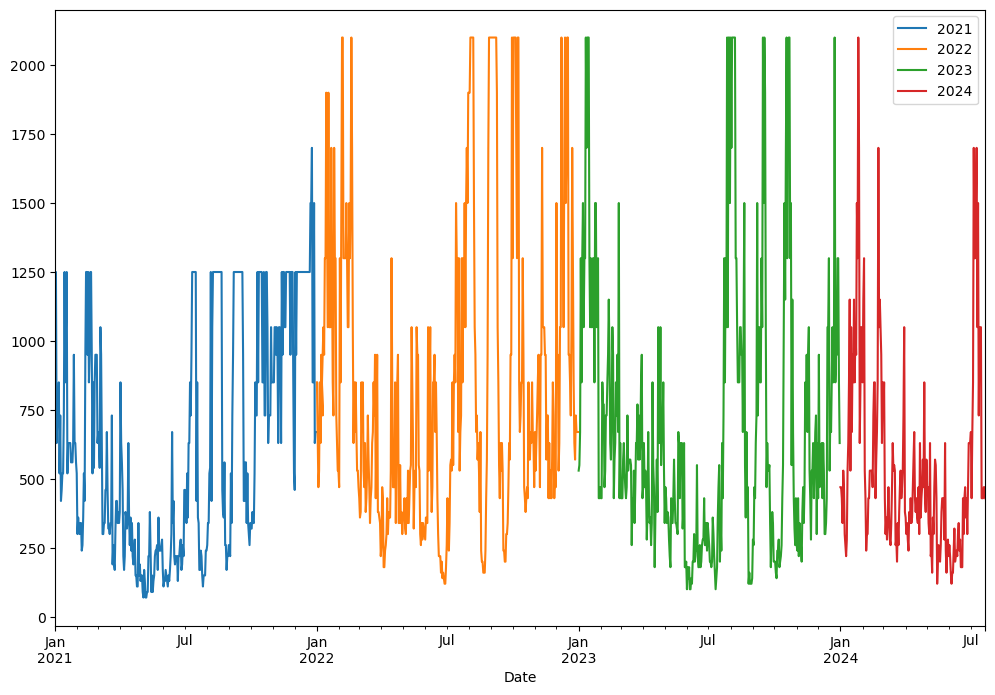

In [36]:
plt.figure(figsize=(12, 8))
df_2021.Price.plot()
df_2022.Price.plot()
df_2023.Price.plot()
df_2024.Price.plot()
plt.legend(['2021','2022','2023','2024'])
plt.show()

In [38]:
df=df.drop('year',axis=1)

In [48]:
##Moving Average

# Assuming df is already defined with the 'Price' column
optimal_n = None
best_mse = None

# Extract 'Price' column as a numpy array of type float32
db = df[['Price']].values.astype('float32')

# Prepare an array to store MSE results for each window size n
mean_results_for_all_possible_n_values = np.zeros(int(len(db)/2 - 2))

# Iterate over possible window sizes n, starting from 3 to len(db)/2
for n in range(3, int(len(db)/2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    
    # Calculate the MSE for each position i
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i + n]) - db[i + n][0], 2)
    
    # Store the average MSE for the current n
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

# Get the optimal n and the best MSE
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3  # Add 3 since n starts from 3
best_mse = np.min(mean_results_for_all_possible_n_values)

# Output results
print("Mean Squared Errors for all n values:", mean_results_for_all_possible_n_values)
print("Best MSE:", best_mse)
print("Optimal n (window size):", optimal_n)

Mean Squared Errors for all n values: [ 68418.10893717  74810.7398568   82260.82330468 ... 267887.62083718
 268034.24923306 268185.74236124]
Best MSE: 68418.10893717236
Optimal n (window size): 3


In [49]:
##forecast the t+1 observation
print("MA =",np.mean(db[:, 0][len(db)-optimal_n:len(db)]))

MA = 456.66666


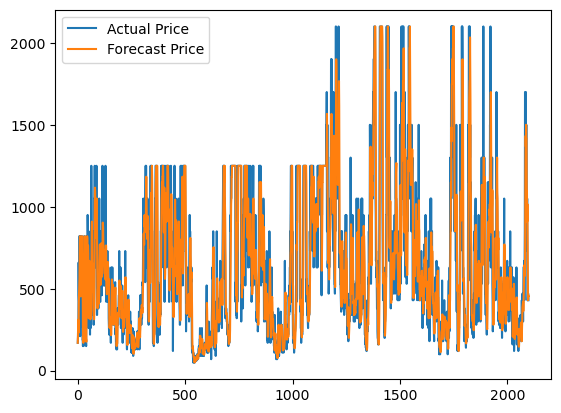

In [50]:
forecast=np.zeros(len(db)+1)
for i in range(0,optimal_n):
    forecast[i]=db[i][0]
for i in range(0,len(db)-optimal_n+1):
    forecast[i+optimal_n]=np.mean(db[:,0][i:i+optimal_n])
plt.plot(db[:, 0],label= 'Actual Price')
plt.plot(forecast,label="Forecast Price")
plt.legend()
plt.show()